In [14]:
import json
import os
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sns.set_theme(context='notebook')

In [15]:
train_folder = "../data/en/train_split"
save_folder = "../data/en/train_subset"
root_folder = "../data/en/acc_split"

In [16]:
train_results = dict()
for file in os.listdir(save_folder):
    prepend, acc = os.path.splitext(file)[0].split("_")
    if acc not in train_results:
        train_results[acc] = dict()
    dur, n_samples = 0, 0
    fname = os.path.join(save_folder, file)
    
    try:
        for line in open(fname):
            n_samples += 1
            dur += json.loads(line)["duration"]
        train_results
        train_results[acc][prepend] = {
            "n_samples": n_samples,
            "dur": round(dur / 3600, 2),
            "avg_dur" : round((dur/60)/n_samples ,4)
        }
    except Exception:  # file does not exist
        print(f"{fname} does not exist")
        continue


../data/en/train_subset/test_None.txt does not exist


In [17]:
pprint(train_results)

{'None': {},
 'au': {'test': {'avg_dur': 0.0837, 'dur': 1.43, 'n_samples': 1022},
        'train': {'avg_dur': 0.0837, 'dur': 5.7, 'n_samples': 4088}},
 'ca': {'test': {'avg_dur': 0.0865, 'dur': 1.71, 'n_samples': 1186},
        'train': {'avg_dur': 0.0866, 'dur': 6.85, 'n_samples': 4747}},
 'de': {'test': {'avg_dur': 0.1152, 'dur': 1.57, 'n_samples': 817},
        'train': {'avg_dur': 0.116, 'dur': 6.33, 'n_samples': 3271}},
 'hk': {'test': {'avg_dur': 0.0815, 'dur': 0.58, 'n_samples': 426}},
 'ie': {'test': {'avg_dur': 0.089, 'dur': 1.4, 'n_samples': 946}},
 'in': {'test': {'avg_dur': 0.0892, 'dur': 2.96, 'n_samples': 1992},
        'train': {'avg_dur': 0.0892, 'dur': 11.84, 'n_samples': 7969}},
 'ni': {'test': {'avg_dur': 0.0796, 'dur': 0.79, 'n_samples': 596}},
 'nz': {'test': {'avg_dur': 0.0796, 'dur': 1.58, 'n_samples': 1187}},
 'ph': {'test': {'avg_dur': 0.087, 'dur': 0.74, 'n_samples': 510}},
 'sc': {'test': {'avg_dur': 0.0941, 'dur': 2.43, 'n_samples': 1547}},
 'sg': {'test': 

In [19]:
#Calculate amount of test and train samples
train_samples = 0
test_samples = 0
train_duartion = dict()
keys = ["train","test"]

for i in train_results:
    if keys[0] in train_results[i]:
        train_samples += train_results[i][keys[0]]['n_samples']

    if keys[1] in train_results[i]:
        test_samples += train_results[i][keys[1]]['n_samples']


pprint("Train samples: " + str(train_samples))
pprint("Test samples: "  + str(test_samples))

'Train samples: 61415'
'Test samples: 21736'


In [7]:
df = pd.read_json("../data/en/acc_split/au.json")
keys = df.keys()

df[keys[2]] = df[keys[2]].round(0)
df2 = df.pivot_table(index = keys[2], aggfunc ='size')
#df2.reset_index(inplace=True)
category = df2.to_frame("count")
print(category)

          count
duration       
1.0          96
2.0        2579
3.0        7179
4.0       10907
5.0       11256
6.0        9142
7.0        5918
8.0        2689
9.0        1007
10.0        299
11.0         19
12.0          5
13.0          4
14.0          1
15.0          3
16.0          1
18.0          1
20.0          1
22.0          1


In [8]:
#Only Audiofiles smaller then 12sec are considered as they are mostly singles afterwards
dataframe_duration = dict()
for file in os.listdir(root_folder):
    acc = os.path.splitext(file)[0]

    df = pd.read_json(os.path.join(root_folder,file))
    df[keys[2]] = df[keys[2]].round(0)
    filtered = df[df[keys[2]] < 12]
    df2 = filtered.pivot_table(index = keys[2], aggfunc ='size')
    
    category = df2.to_frame("count")
    
    dataframe_duration[acc]= {
            "duration": category
        }
    


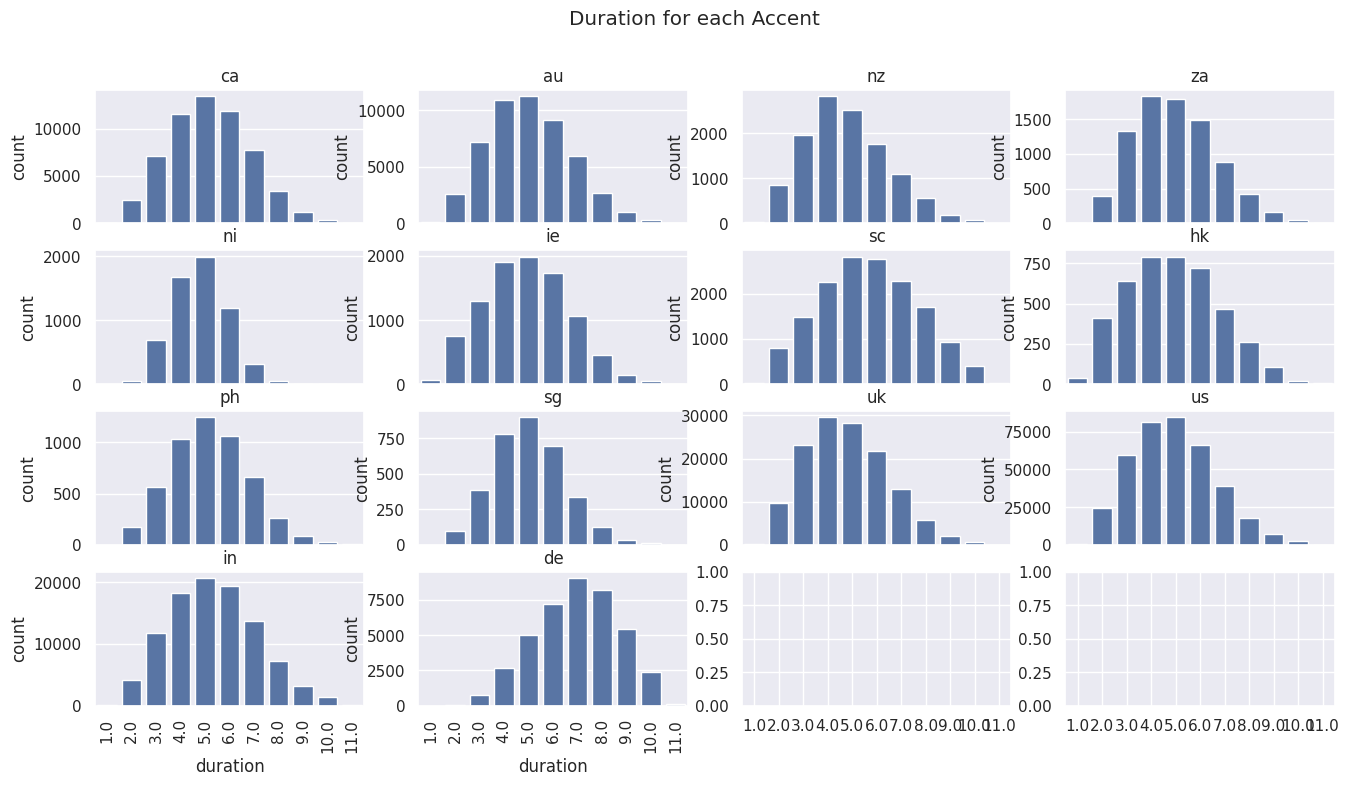

In [13]:
acc = list(dataframe_duration.keys())
size = [3,3,0,0]
fig, axes = plt.subplots(4, 4, sharex=True, figsize=(16,8))
fig.suptitle('Duration for each Accent')

axes[0,0]
for acc in list(dataframe_duration.keys()):
    sns.barplot(ax=axes[size[3],size[2]], x="duration", y="count", data=dataframe_duration[acc]["duration"] ,errorbar=None)
    axes[size[3],size[2]].set_title(acc)
    axes[size[3],size[2]].tick_params(axis= 'x', labelrotation = 90)
    if size[2] == size[0]:
        size[2] = 0
        size[3] += 1
    else:
        size[2] += 1
